In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Нормальное распределение

Вот так можно сгенерировать выборку из нормально распределённой случайной величины с параметрами $\mu=2.0$ и $\sigma=0.5$:

In [4]:
mu = 2.0
sigma = 0.05

# зададим нормально распределенную случайную величину
norm_rv = sts.norm(loc=mu, scale=sigma)

# сгенерируем 10 значений
norm_rv.rvs(size=10)

array([1.96871085, 2.0843317 , 2.01733021, 1.98316388, 2.03294979,
       2.07104861, 2.03137236, 2.00572232, 1.93929957, 2.01528672])

Параметр ```loc``` задаёт $\mu$, `"scale"` — среднеквадратичное отклонение $\sigma$, ```size``` — размер выборки. Имя параметра ```size``` при вызове функции ```rvs``` можно не писать.

Следующая функция возвращает значение функции распределения нормальной случайной величины в точке, соответствующей её аргументу:

In [5]:
norm_rv.cdf(3)

1.0

Построим график функции распределения:

Text(0.5, 0, '$x$')

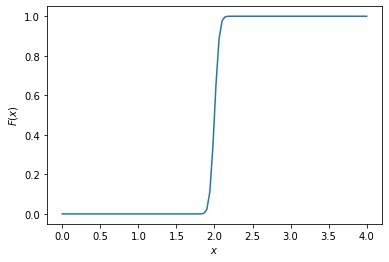

In [7]:
x = np.linspace(0,4,100)
cdf = norm_rv.cdf(x) # функция может принимать и вектор (x)
plt.plot(x, cdf)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

А так можно вычислить значение функции плотности вероятности нормального распределения в заданной точке:

In [8]:
norm_rv.pdf(3)

1.1041896724319527e-86

Построим график функции плотности вероятности:

Text(0.5, 0, '$x$')

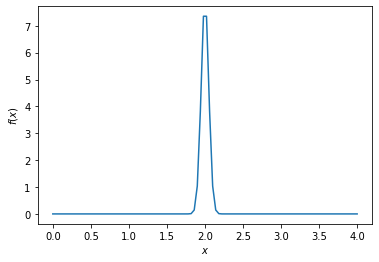

In [9]:
x = np.linspace(0,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Равномерное распределение на отрезке

Вот так можно сгенерировать выборку из случайной величины, имеющей равномерное распределение на отрезке $[a,b]$:

In [7]:
a = 1
b = 4

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

array([ 2.90068986,  1.30900927,  2.61667386,  1.82853085,  1.11278354,
        1.67101276,  1.48848226,  1.74478797,  1.5155652 ,  2.54059151])

А так — вычислять значения функций распределения и плотностей:

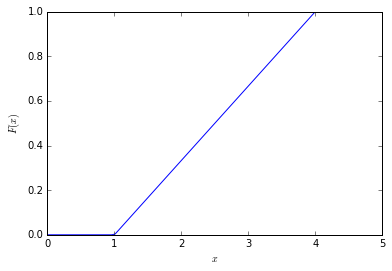

In [8]:
x = np.linspace(0,5,100)
cdf = uniform_rv.cdf(x)
plt.plot(x, cdf)

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

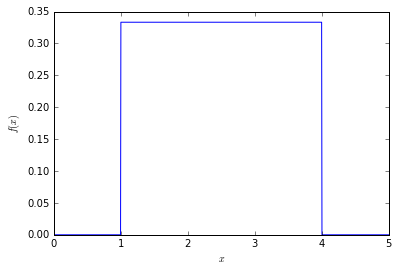

In [9]:
x = np.linspace(0,5,1000)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Распределение Бернулли

Генерация выборок из распределения Бернулли с заданным параметром $p$:

In [22]:
bernoulli_rv = sts.bernoulli(0.5)

bernoulli_rv.rvs(10)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

Text(0, 0.5, 'F(x)')

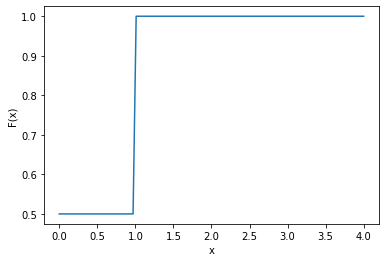

In [23]:
x = np.linspace(0, 4, 100)
cdf = bernoulli_rv.cdf(x)
plt.plot(x, cdf)
plt.xlabel('x')
plt.ylabel('F(x)')


Text(0, 0.5, 'f(x)')

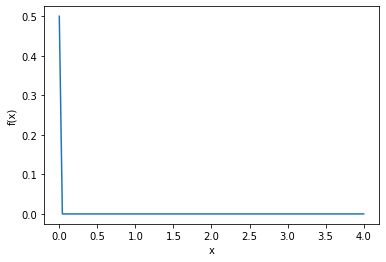

In [24]:
x = np.linspace(0, 4, 100)
pmf = bernoulli_rv.pmf(x)

plt.plot(x, pmf)
plt.xlabel('x')
plt.ylabel('f(x)')

# Биномиальное распределение

Генерация выборок из биномиального распределения:

In [26]:
binomial_rv = sts.binom(20, 0.7)
binomial_rv.rvs(10)

array([11, 14, 13, 17, 11, 16, 13, 12, 16, 18])

Первый аргумент функции binom — значение параметра $n$, второй — параметра $p$.

Функция распределения:

Text(0.5, 0, '$x$')

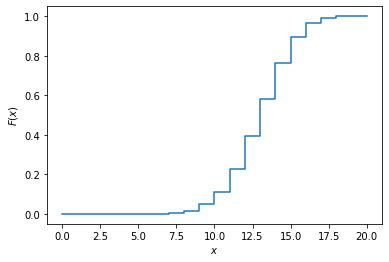

In [29]:
x = np.linspace(0,20,21)
cdf = binomial_rv.cdf(x)
plt.step(x, cdf)

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

Функция вероятности ```pmf``` для дискретных случайных величин заменяет функцию плотности ```pdf```:

Text(0.5, 0, '$x$')

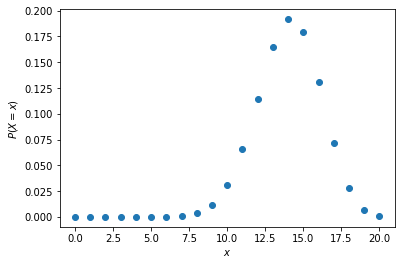

In [30]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

Посмотрим, как ведут себя биномиально распределенные величины при разных значениях параметров:

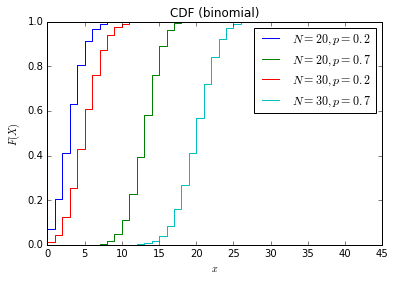

In [14]:
x = np.linspace(0,45,46)
for N in [20, 30]:
    for p in [0.2, 0.7]:
        rv = sts.binom(N, p)
        cdf = rv.cdf(x)
        plt.step(x, cdf, label="$N=%s, p=%s$" % (N,p))
plt.legend()
plt.title("CDF (binomial)")

plt.ylabel('$F(X)$')
plt.xlabel('$x$')

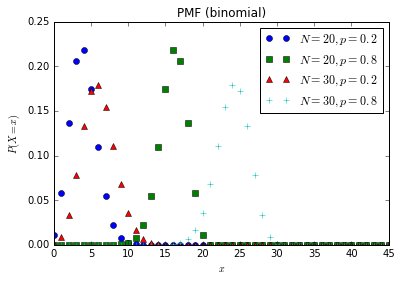

In [15]:
x = np.linspace(0,45,46)
symbols = iter(['o', 's', '^', '+'])
for N in [20, 30]:
    for p in [0.2, 0.8]:
        rv = sts.binom(N, p)
        pmf = rv.pmf(x)
        plt.plot(x, pmf, next(symbols), label="$N=%s, p=%s$" % (N,p))
plt.legend()
plt.title("PMF (binomial)")

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

# Распределение Пуассона

Генерация выборок из распределения Пуассона с параметром $\lambda$:

In [82]:
poisson_rv = sts.poisson(5)
poisson_rv.rvs(10)

array([ 3,  5,  3,  4,  8,  7, 10,  5,  9,  6])

Text(0.5, 0, '$x$')

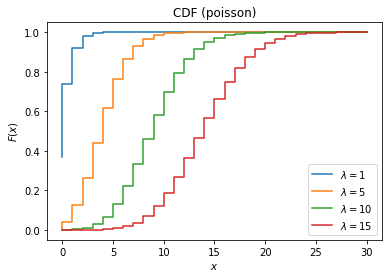

In [83]:
x = np.linspace(0,30,31)
for l in [1, 5, 10, 15]:
    rv = sts.poisson(l)
    cdf = rv.cdf(x)
    plt.step(x, cdf, label="$\lambda=%s$" % l)
plt.legend()
plt.title("CDF (poisson)")

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

[3.67879441e-01 3.67879441e-01 1.83939721e-01 6.13132402e-02
 1.53283100e-02 3.06566201e-03 5.10943668e-04 7.29919526e-05
 9.12399408e-06 1.01377712e-06 1.01377712e-07 9.21615563e-09
 7.68012969e-10 5.90779207e-11 4.21985148e-12 2.81323432e-13
 1.75827145e-14 1.03427732e-15 5.74598513e-17 3.02420270e-18
 1.51210135e-19 7.20048262e-21 3.27294665e-22 1.42302028e-23
 5.92925117e-25 2.37170047e-26 9.12192488e-28 3.37849069e-29
 1.20660382e-30 4.16070283e-32 1.38690094e-33]
[6.73794700e-03 3.36897350e-02 8.42243375e-02 1.40373896e-01
 1.75467370e-01 1.75467370e-01 1.46222808e-01 1.04444863e-01
 6.52780393e-02 3.62655774e-02 1.81327887e-02 8.24217669e-03
 3.43424029e-03 1.32086165e-03 4.71736303e-04 1.57245434e-04
 4.91391982e-05 1.44527054e-05 4.01464038e-06 1.05648431e-06
 2.64121077e-07 6.28859708e-08 1.42922661e-08 3.10701437e-09
 6.47294660e-10 1.29458932e-10 2.48959485e-11 4.61036083e-12
 8.23278719e-13 1.41944607e-13 2.36574345e-14]
[4.53999298e-05 4.53999298e-04 2.26999649e-03 7.5666

Text(0.5, 0, '$x$')

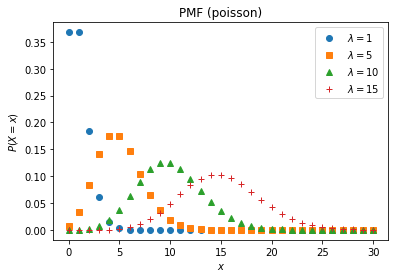

In [86]:
x = np.linspace(0,30,31)

symbols = iter(['o', 's', '^', '+'])
for l in [1, 5, 10, 15]:
    rv = sts.poisson(l)
    pmf = rv.pmf(x)
    plt.plot(x, pmf, next(symbols), label="$\lambda=%s$" % l)
    # распечатать массив распределения вероятностей
    # print(pmf)
plt.legend()
plt.title("PMF (poisson)")

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

# Дискретное распределение общего вида

Чтобы сгенерировать дискретную случайную величину общего вида, нужно задать множество её значений и соответствующих вероятностей и использовать функцию ```numpy.random.choice```:

In [19]:
elements = np.array([1, 5, 12])
probabilities = [0.05, 0.7, 0.25]
np.random.choice(elements, 10, p=probabilities)

array([ 5, 12, 12, 12,  5, 12,  5,  5,  5,  5])

# Другие распределения

Существует большое количество других стандартных семейств распределений, многие из которых также можно генерировать в Питоне. 
Например, распределение хи-квадрат $\chi^2_k$, имеющее натуральный параметр $k$, который называется числом степеней свободы:

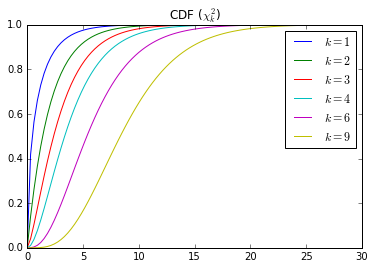

In [20]:
x = np.linspace(0,30,100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = sts.chi2(k)
    cdf = rv.cdf(x)
    plt.plot(x, cdf, label="$k=%s$" % k)
plt.legend()
plt.title("CDF ($\chi^2_k$)")

Text(0.5, 1.0, 'PDF ($\\chi^2_k$)')

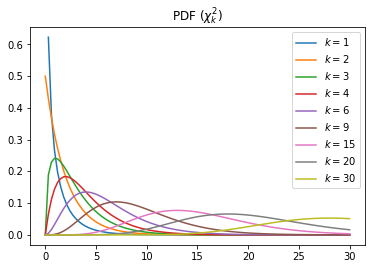

In [39]:
x = np.linspace(0,30,100)
for k in [1, 2, 3, 4, 6, 9, 15, 20, 30]:
    rv = sts.chi2(k)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$k=%s$" % k)
plt.legend()
plt.title("PDF ($\chi^2_k$)")

Полный список функций SciPy для работы со всеми распределениями можно найти тут: http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html

n_list = [5, 10, 20, 40, 80]

for n in n_list:
    norm_rv = sts.norm(loc=n, scale=np.sqrt(2*n))
    chi2_rv = sts.chi2(n)

    x = np.linspace(0, 2*n_list[len(n_list)-1], 100)

    pdf_norm = norm_rv.pdf(x)
    pdf_chi2 = chi2_rv.pdf(x)

    plt.plot(x, pdf_norm, label='Norm (mu = {0:0.0f}, var = {1:0.1f})'.format(n, np.sqrt(2*n)))
    plt.plot(x, pdf_chi2, label = 'Chi2 (n = {0:0.0f})'.format(n))
    plt.legend()
    plt.title('Norm vs Chi2 {0:d}'.format(n))